# Birds of India: Exploring trends and concerns

## 1 The research space

### 1.1 Background
Birds are depicted in Indian art and craft - miniature paintings, murals, sculptures, reliefs, architecture and temples - for centuries. They were also mentioned in Indian mythology alongside deities - like Jatayu, the demigod vulture in the Hindu epic Ramayana and Indra the demigod peacock, as the vehicle of Saraswati, the goddess of knowledge and wisdom - over 2,500 years ago. Thus the birds appear regularly in religion and folklore and are worshipped by the people of India for their attributes and actions as predators and scavengers, and as the harbinger of monsoon therefore for health and well-being, among many other customs and beliefs.

### 1.2 Aims and objectives
Lives of birds, animals and people in India are intertwined and their connection is clear, but does that mean that the overall health of Indian birds are not cause of concern despite of the fact that bird population is declining globally? How do the birds in different regions of India compare in their abundance and long-term future? And how the birds in Gujarat - the region I grew up in - are faring? I aim to find out if some of my questions can be answered and interesting insights can be made using the data that I have discussed below.

## 2 Data

### 2.1 About the data source
eBird - the database about the bird distribution and population have increasingly been used in India by amateur birdwatchers, ornithologists and scientists. An initiative known as State of India's Birds 2020 (SOIB) - the most comprehensive report about the conservation status of most of the bird species in India - is based on the data available on eBird. The report and the CSV data available on SOIB website is the result of scientific analysis and the processes of standardisation of records and sightings made by thousands of independent birdwatchers and uploaded on eBird platform.

A total of 867 bird species are explored for their conservation status using this dataset. This assessment is based on three indices - long-term trend, current annual trend and distribution range size - together with IUCN Red List. Despite of this significant effort, not all the questions are answered due to lack of data and disappearances of some species of birds.

### 2.2 The headers and definitions
**Serial Number**: Incrementing record number<br>
**Common Name**: Commonly used name in India<br>
**Scientific Name**: Species nomenclature<br>
**IUCN Status**: The status assessed by International Union for Conservation of Nature<br>
**WLPA Schedule**: Wildlife Protection Act schedule type. Schedule-1 being the highest level of legal protection<br>
**Analysed Long-term**: Yes or no<br>
**Analysed Current**: Yes or no<br>
**Long-term Trend (%)**: Over 25 years (pre-year-2000 - 2018)<br>
**Long-term Trend CI (%)**: 95% confidence interval around the mean estimate for the above trend<br>
**Current Annual Change (%)**: More recent, over last 5 years (2014 - 2018)<br>
**Current Annual Change CI (%)**:  95% confidence interval around the mean estimate for the above trend<br>
**Distribution Range Size (units of 10,000 sq. km.)**: Abundance index calculated by gridding the country in 100 km x 100 km cells<br>
**Distribution Range Size CI (units of 10,000 sq. km.)**: Confidence Interval for the above<br>
**Long Term Status**: Based on Long-term Trend<br>
**Current Status**: Based on Current Annual Change<br>
**Distribution Status**: Based on Distribution Range Size<br>
**Status of Conservation Concern**: Assessed using three indices and IUCN Red List (as discussed above)<br>
**Assessed Primarily Based On**: Trends and/or Range Size and/or IUCN Red List<br>
**Migratory Status**: Resident or Migratory-Local or Migratory-Long-Distance<br>

### 2.3 Technical exploration
Not so much of clean up and re-structuring of data was needed. Some columns like 'Serial Number', 'Scientific Name' and 'Assessed Primarily Based On' are not so useful for this project so they were excluded in most cases. Types of value in the data are floating point numbers, booleans and string. Most string values with the exception of 'Common Name' could be converted into constants in the program for reusability and to improve readability.

### 2.4 Ethical considerations
eBird platform outlines guidelines for ethical birding and clearly defines birdwatcher's code of conduct. Numerous datasets were acquired from eBird by SOIB researchers and their partners to generate the final report and the spreadsheet which are now made publicly available on their website without terms of use agreement. Therefore this data can be used for further explorations and study. I agree to share my conclusions with SOIB for their consideration and feedback if required due to any conflict it may cause. Anonymisation of data is also not needed due to the absence of sensitive information in the data. On a lighter note, Indian peafowl - the national bird, notoriously known to be damaging crops wouldn't mind if their whereabouts (distribution range) is revealed to the public, for they enjoy the highest level of legal protection in the country being placed in Schedule 1 of the WLPA 1972.

### 2.5 Other datasets
The SOIB report and data lack statistical analysis and conservation concerns by political states, regions and union territories of the country. I acquired the list of key species (out of the 867 assessed) and the states they are identified with from the SOIB report. I also used other resources like Bubo Birding (created by Mike Prince, a British Birder who specialises in the birds of South Asia) to research the checklists based on verified sightings of the birds of India by state.

## 3 Project

### 3.1 Scope, goals and objectives
India is a stable economy and one of the world's largest democracies. 28 states and 8 union territories of India enjoy political autonomy and have their own governance. Political stability, crime rates, quality of air and water, green spaces, physical and human geography, level of literacy and education among many other social factors vary between these states. By analysing SOIB data, I aim to explore the impact of these factors on ecology and bird life in particular, and make connections between the conservation concerns of birds and the states they are identified with in this project.

### 3.2 Approach
I've selected seven random sample regions from the list "Key Species for States" in the report to compare long-term trend, current trend and the overall conservation status of the bird species identified with these regions. The idea is to draw some conclusion for decline although causes for concern are well-documented in the report as well as in the resources available online.


## 4 Data analysis

### 4.1 Global imports and variables
Sample regions are stored in 'filenames' in a list format and each name in the list corresponds to the title in 'titles'. All key string values for the bar charts are stored in the global variables.

In [1]:
# Import modules and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 8.5})
plt.style.use("_mpl-gallery")

# Get data and define global variables
soib_data = pd.read_csv("data/state-of-indias-birds-2020.csv")
filenames = [
    "andaman-nicobar-islands",
    "arunachal-pradesh",
    "assam",
    "gujarat",
    "tamilnadu",
    "himachal-pradesh",
    "kerala"
]
titles = [
    "Andaman & Nicobar Islands",
    "Arunachal Pradesh",
    "Assam",
    "Gujarat",
    "Tamil Nadu",
    "Himachal Pradesh",
    "Kerala"
]
status_map = {
    "Unknown": [0, "green"],
    "Low": [1, "blue"],
    "Moderate": [2, "orange"],
    "High": [3, "red"]
}
status_labels = ["Low", "Moderate", "High"]
status_bar_colors = ["tab:blue", "tab:orange", "tab:red"]
title_main_hbar = "State of India's birds"
title_main_count_hbar = "Status of Conservation Concern for 867 key species"
xlabel_hbar = "Status of Conservation Concern"
ylabel_hbar = "Common Names"

### 4.2 Utility functions
These functions are reusable. They take a number of parameters to plot various horizontal bar charts.

In [2]:
# Utility functions

# Render horizontal bar
def render_barh_plot(y, x, title, plot_width, plot_height, bar_labels, bar_colors, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(plot_width, plot_height))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.barh(y, x, label=bar_labels, color=bar_colors)
    plt.show()
    
# Set axis data for horizontal bar    
def set_axis_data(data_y, data_x, bar_labels, bar_colors, y_tick, status):
    data_y.append(y_tick)
    x_tick = status_map[status][0]
    bar_color = status_map[status][1]
    data_x.append(x_tick)
    bar_labels.append(status)
    bar_colors.append("tab:" + bar_color)
    
# Calculate the count or the percentage of the status of conservation concern
def calculate_status(status_labels, count_dict, total_count):
    arr = []
    
    for i in range(len(status_labels)):
        status = status_labels[i]
        
        if not status in count_dict:
            count_dict[status] = 0
            
        mult = 100 / total_count
        arr.append(count_dict[status] * mult)
        
    return arr

### 4.3 Comparison of all bird species by the conservation status
I've plotted a horizontal bar chart using the main dataset to compare the status of conservation concern of all 867 bird species.

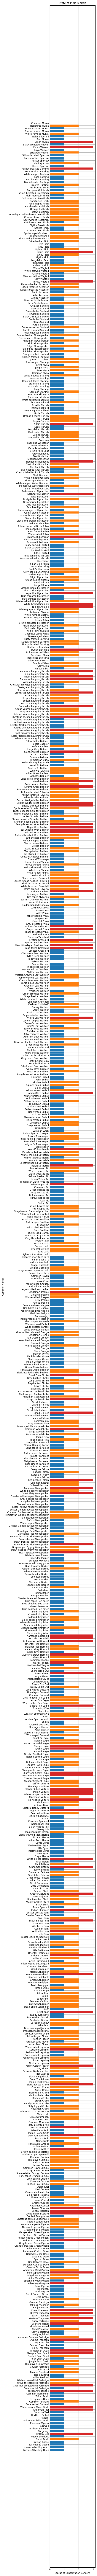

In [3]:
# Create horizontal bar chart using the main dataset
def create_hbar_chart_main():
    soib_arr = soib_data.to_numpy()
    bird_common_names = []
    conservation_concern_statuses = []
    bar_labels = []
    bar_colors = []
    
    for i in range(len(soib_arr)):
        status = soib_arr[i][16]
        
        if not type(status) == str:
            status = "Unknown"
            
        common_name = soib_arr[i][1]
        set_axis_data(bird_common_names, conservation_concern_statuses, bar_labels, bar_colors, common_name, status)
        
    y = bird_common_names
    x = conservation_concern_statuses
    
    render_barh_plot(y, x, title_main_hbar, 2.5, 140, bar_labels, bar_colors, xlabel_hbar, ylabel_hbar)
        
create_hbar_chart_main()

### 4.4 Plotting the status count
As seen in the graph below, I have calculated that 101 of all 867 bird species (about 11%) are declining rapidly and there is moderate conservation concern for 319 bird species. But how are they distributed across the regions? Exploration of the sample regions may give us some insight.

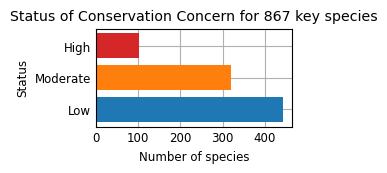

In [4]:
# Create horizontal bar chart using the total count of the status of conservation concern of all species in the main dataset
def create_barh_chart_main_count():
    soib_arr = soib_data.to_numpy()
    status_count = []
    count_dict = {}
    
    for i in range(len(soib_arr)):
        status = soib_arr[i][16]
        
        if type(status) == str:
            if status in count_dict:
                 count_dict[status] += 1
            else:
                count_dict[status] = 1
                
    # Passing total count 100 so percentage is not calculated for this plot                          
    status_count = calculate_status(status_labels, count_dict, 100)
        
    y = status_labels
    x = status_count
    render_barh_plot(y, x, title_main_count_hbar, 2, 1, status_labels, status_bar_colors, "Number of species", "Status")
    
create_barh_chart_main_count()

### 4.5 Exploration of sample regions
Sample regions and the species they are associated with are compared by the conservation status in order to discover any interesting pattern and trend. Nearly all bird species in some of the greenest regions of the country like Kerala, Arunachal Pradesh and Andaman & Nicobar Islands are threatened. I was not expecting to see this result. The birds in the state of Gujarat are also placed under moderate and high categories of conservation concern.

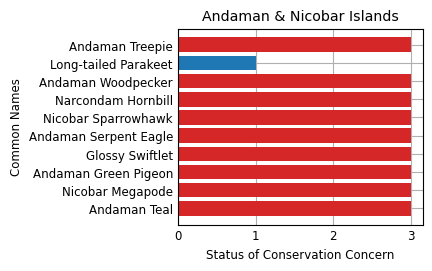

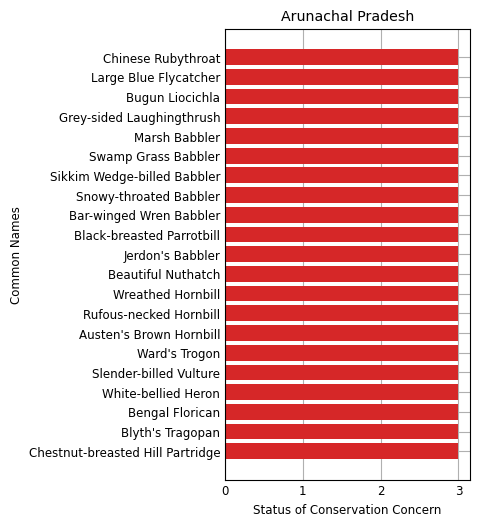

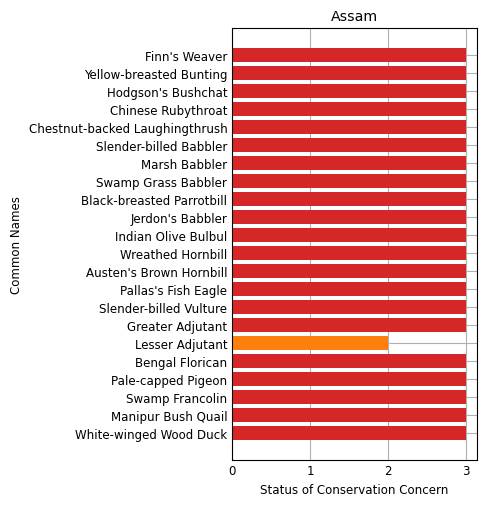

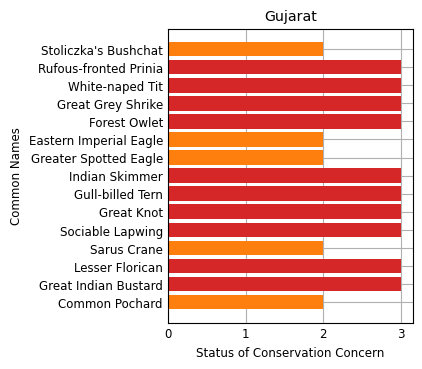

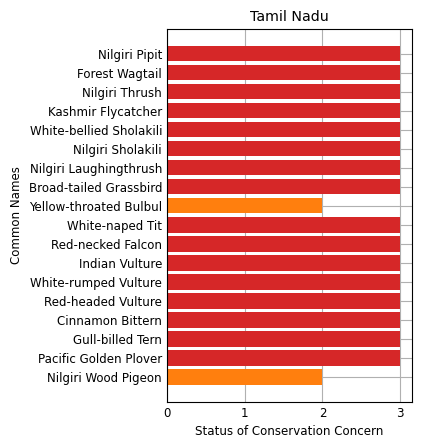

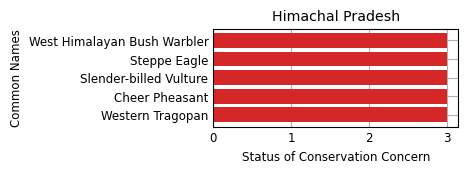

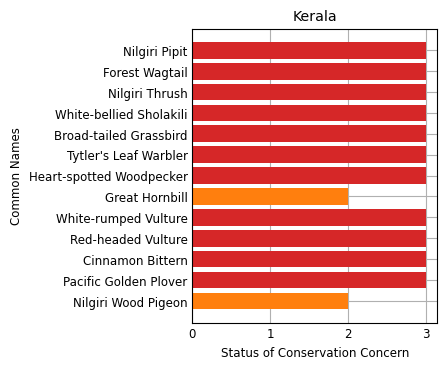

In [5]:
# Create horizontal bar chart using sub-sections of the main dataset 
def create_hbar_chart_minor(filename, title):
    path = "data/" + filename + ".csv"
    data = pd.read_csv(path)
    soib_arr = soib_data.to_numpy()
    arr = data.to_numpy()
    bird_common_names = []
    conservation_concern_statuses = []
    bar_labels = []
    bar_colors = []
    
    for i in range(len(soib_arr)):
        common_name = soib_arr[i][1]
        
        if (common_name in arr[0]):
            status = soib_arr[i][16]
            
            if not type(status) == str:
                status = "Unknown"
                
            set_axis_data(bird_common_names, conservation_concern_statuses, bar_labels, bar_colors, common_name, status)
    
    y = bird_common_names
    x = conservation_concern_statuses
    
    render_barh_plot(y, x, title, 2.5, len(arr[0]) / 5, bar_labels, bar_colors, xlabel_hbar, ylabel_hbar)

# Create all horizontal bar charts using smaller datasets 
def create_hbar_charts_minor():
    for i in range(len(filenames)):
        create_hbar_chart_minor(filenames[i], titles[i])

create_hbar_charts_minor()

### 4.6 Simplifying the result
For simplicity of comparison, each sample region is plotted by the percentages calculated using the conservation status of all bird species in the respective state or union territory.

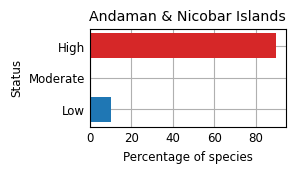

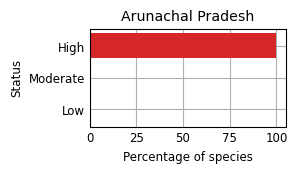

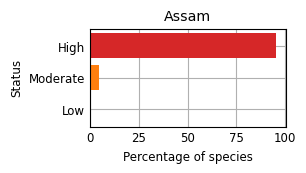

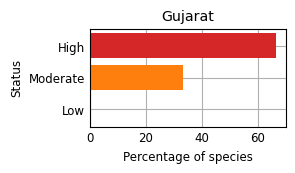

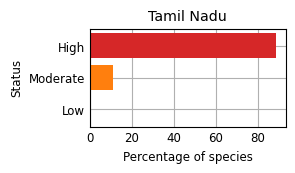

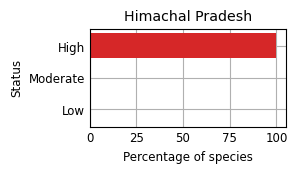

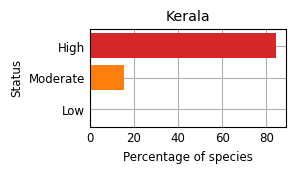

In [6]:
# Create horizontal bar chart calculating the percentage of the status of conservation concern of all species using the sub-section of the main dataset
def create_barh_chart_minor_percent(filename, title):
    path = "data/" + filename + ".csv"
    data = pd.read_csv(path)
    arr = data.to_numpy()
    soib_arr = soib_data.to_numpy()
    status_percent = []
    total_count = 0
    count_dict = {}
    
    for i in range(len(soib_arr)):
        common_name = soib_arr[i][1]
        if (common_name in arr[0]):
            status = soib_arr[i][16]
            
            if type(status) == str:
                total_count += 1
                
                if status in count_dict:
                     count_dict[status] += 1
                else:
                    count_dict[status] = 1
                                                
    status_percent = calculate_status(status_labels, count_dict, total_count)
            
    y = status_labels
    x = status_percent
    render_barh_plot(y, x, title, 2, 1, status_labels, status_bar_colors, "Percentage of species", "Status")
        
# Create all horizontal bar charts using smaller datasets 
def create_barh_charts_minor_percent():
    for i in range(len(filenames)):
        create_barh_chart_minor_percent(filenames[i], titles[i])

create_barh_charts_minor_percent()

## 5 Conclusion

### 5.1 Summary
Although there are causes for concern for many bird species in India, majority of species are stable and have low or moderate conservation concern. As nearly all birds in the sample regions are flagged in the charts, the connection between the regions and decline or growth in population has not been revealed.

###  5.2 Final remarks
Further explorations of the distribution range of 442 species of low conservation concern and comparison by long-term trend and current trend could reveal interesting relationships and trends. Other datasets and resources can also be considered to better understand the reasons for decline of some of the bird species in India.

## 6 Resources

### 6.1 Visualisation with data
Coursera video tutorials, [online]. https://www.coursera.org/learn/uol-cm2015-programming-with-data<br>
Pandas, [online]. https://pandas.pydata.org/docs/user_guide/index.html<br>
NumPy, [online]. https://numpy.org/doc/stable/user/absolute_beginners.html<br>
Matplotlib, [online]. https://matplotlib.org/stable/tutorials/index.html

### 6.2 Birds of India
eBird, [online]. https://ebird.org/india/<br>
State of India's Birds 2020, [online]. https://www.stateofindiasbirds.in/<br>
Wikipedia, [online]. https://en.wikipedia.org/wiki/List_of_birds_of_India<br>
Bubo Birding, [online]. https://bubobirding.com/checklists-of-the-birds-of-india-by-state/<br>
Discover Wildlife, [online]. https://www.discoverwildlife.com/news/indias-bird-population-in-serious-decline-finds-new-study/